In [1]:
from selenium import webdriver
import time
from time import sleep
from IPython import html
from IPython.core.display import display, HTML
import pickle
import glob
from nbmultitask import ProcessWithLogAndControls
from IPython.display import clear_output
from nbmultitask import ThreadWithLogAndControls
from PIL import Image
import base64
import io
from IPython.display import SVG, display
from cairosvg import svg2png
import pytesseract
from uuid import uuid4
from glob import glob
import numpy as np
import json
import pickle
import plotly.express as px
import pandas as pd
import collections

# sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, \
                                recall_score, \
                                accuracy_score, \
                                precision_score, \
                                f1_score, \
                                plot_confusion_matrix, \
                                roc_curve


def display_svg(data):
    display(SVG(data))

def get_driver():
    options = webdriver.ChromeOptions()
    options.binary_location = "/Applications/Google Chrome 2.app/Contents/MacOS/Google Chrome"
    chrome_driver_binary = "driver/chromedriver"
    driver = webdriver.Chrome(chrome_driver_binary, chrome_options=options)
    return driver

# def login_page(driver):
#     driver.get("https://leetcode.com/accounts/login/")
#     username = driver.find_element_by_name("login")
#     password = driver.find_element_by_name("password")
#     username.send_keys("vishnu-srivastava@hotmail.com")
#     password.send_keys("Saibaba_1")

def save_cookies(driver):
    pickle.dump( driver.get_cookies() , open("cookies.pkl","wb"))
    

def load_cookies(driver):
    cookies = pickle.load(open("cookies.pkl", "rb"))
    for cookie in cookies:
        driver.add_cookie(cookie)
        
# def load_leetcode():
#     driver = get_driver()
#     driver.get('https://leetcode.com/')
#     # login_page(driver)## Please login
#     # save_cookies(driver)
#     load_cookies(driver)
#     driver.get('https://leetcode.com/')
#     return driver
    

/opt/anaconda3/lib/python3.8/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


## Downloading samples


In [7]:
str(uuid4())

'7cf868a9-5c84-4c95-8534-d7ca245d33fb'

In [3]:
driver = get_driver()
driver.get('https://selfregistration.cowin.gov.in/')

<ipython-input-1-c058b8819be1>:26: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_driver_binary, chrome_options=options)


In [4]:
if driver.current_url == 'https://selfregistration.cowin.gov.in/dashboard':
    print('processing !')

processing !


In [21]:
driver.find_element_by_link_text('Refresh').click()

In [5]:
# get base 64 image
img_base64_encoded = driver.find_element_by_id('captchaImage').get_attribute('src').split(',')[-1]
# img_base64_encoded

## Loading Samples

In [56]:
img_files = sorted(glob('captcha_samples/*'))
print(len(img_files))
print(img_files[:5])

603
['captcha_samples/000edfb9-f298-4634-b79b-bffadd629444.b64', 'captcha_samples/005f3081-f46f-44da-abc8-18d0ac186774.b64', 'captcha_samples/01e42b81-22c2-4c03-b620-d053dac9b9ac.b64', 'captcha_samples/0270d4d5-e302-45d9-867f-da2cbf08a147.b64', 'captcha_samples/03582e39-80bb-4d4a-a432-e5b97dd5d68b.b64']


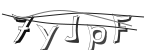

In [57]:
# decode base 64 image
idx=89
with open(img_files[idx], 'r') as img_file:
    img_base64_decoded = base64.b64decode(img_file.read())
display_svg(img_base64_decoded)

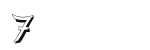

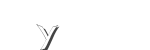

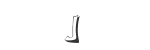

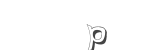

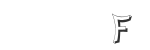

In [58]:
# get rid of all the lines
svg_rows = [x+'>' for x in img_base64_decoded.decode("utf-8").split('>')[:-1] \
            if 'fill="none"' not in x]

# sort characters
svg_chars = []
for row in sorted(svg_rows[1:-1], key=lambda x: float(x.split(' ')[2][4:])):
    svg_chars.append(svg_rows[0]+row+svg_rows[-1])

# show characters
for svg_char in svg_chars:
    display_svg(''.join(svg_char))

In [60]:
char = svg_chars[0]
png = svg2png(bytestring=char)
pil_img = Image.open(io.BytesIO(png))
print('original cahr image size: ',pil_img.size)
arr_img = np.array(pil_img)
x1,y1,x2,y2=0,0,0,0
for j in range(len(arr_img[0])):
    flag=False
    for i in range(len(arr_img)):
        if arr_img[i][j].all() != 0:
            x1,y1=i,j
            flag=True
            break
    if flag:
        break
for j in range(len(arr_img[0])-1,-1,-1):
    flag=False
    for i in range(len(arr_img)):
        if arr_img[i][j].all() != 0:
            x2,y2=i,j
            flag=True
            break
    if flag:
        break
print(x1,y1,x2,y2)
print(y2-y1)
arr_img = arr_img[:,y2-30:y2+1]
print(arr_img.shape)
pil_img = Image.fromarray(arr_img)
display(pil_img)


original cahr image size:  (150, 50)
13 11 16 34
23
(50, 31, 4)


#### minimum end for 0th char = 33
#### minimum width = 20
#### maximum width = 30

In [61]:
img_files[0].split('/')[-1].split('.')[0]

'000edfb9-f298-4634-b79b-bffadd629444'

In [64]:
existing_files = set([x.split('_')[-1] for x in glob('captcha_outputs/*')])
existing_files

{'0-000edfb9-f298-4634-b79b-bffadd629444.pkl',
 '1-000edfb9-f298-4634-b79b-bffadd629444.pkl',
 '2-000edfb9-f298-4634-b79b-bffadd629444.pkl',
 '3-000edfb9-f298-4634-b79b-bffadd629444.pkl'}

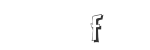

KeyboardInterrupt: Interrupted by user

In [156]:
def captcha_output():
    existing_files = set([x.split('_')[-1] for x in glob('captcha_outputs/*')])
    
    for img_file in img_files:
        
        filename = img_file.split('/')[-1].split('.')[0]
        
        # load image file
        with open(img_file, 'r') as img:
            img_base64_decoded = base64.b64decode(img.read())
            
        
        # get rid of all the lines
        svg_rows = [x+'>' for x in img_base64_decoded.decode("utf-8").split('>')[:-1] \
                    if 'fill="none"' not in x]

        # sort characters
        svg_chars = []
        for row in sorted(svg_rows[1:-1], key=lambda x: float(x.split(' ')[2][4:])):
            svg_chars.append(svg_rows[0]+row+svg_rows[-1])
            
        
        # get char png
        for cidx,char in enumerate(svg_chars):
            if str(cidx)+'-'+filename+'.pkl' in existing_files:
                continue
            png = svg2png(bytestring=char)
            pil_img = Image.open(io.BytesIO(png))
            arr_img = np.array(pil_img)
            x2,y2=0,0
            for j in range(len(arr_img[0])-1,-1,-1):
                flag=False
                for i in range(len(arr_img)):
                    if arr_img[i][j].all() != 0:
                        x2,y2=i,j
                        flag=True
                        break
                if flag:
                    break
            if y2<30:
                arr_img = np.concatenate((arr_img[:, y2+1:y2+30-y2],arr_img), axis=1)
                y2+=30-y2
            clear_output()
            display(pil_img)
            arr_img = arr_img[:,y2-30:y2+1]
            pil_img = Image.fromarray(arr_img)
            display(pil_img)
            ch = input('what_do_you_see ?')
            if ch=="'":
                continue
            with open('captcha_outputs/'+ch+'_'+str(cidx)+'-'+filename+'.pkl', 'wb') as out_file:
                pickle.dump(arr_img, out_file)

        
        

captcha_output()

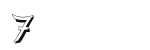

In [105]:
display(Image.open(io.BytesIO(png)))

### Analyzing results

In [157]:
captcha_outputs = list(glob('captcha_outputs/*'))
print(len(captcha_outputs))
print(captcha_outputs[:5])

689
['captcha_outputs/G_0-27843b69-ee47-4c5f-bd84-01b915f2cc0e.pkl', 'captcha_outputs/G_0-29540b19-8dbc-46a2-a82b-eaf8ef5a95e1.pkl', 'captcha_outputs/h_4-1b83cde4-3248-4665-acfd-1901eb8d78c5.pkl', 'captcha_outputs/w_4-2cede5e3-426f-4495-9bb4-cf4b6e27fb44.pkl', 'captcha_outputs/p_3-1ecd1f19-19e1-451b-be1e-e1209a50c7ca.pkl']


In [158]:
valid_chars = set([str(i) for i in range(10)]+[chr(i) for i in range(97,123)]+[chr(i) for i in range(65,91)])
print(len(valid_chars))
for captcha_output in captcha_outputs:
    if captcha_output.split('/')[-1].split('_')[0] not in valid_chars or \
        len(captcha_output.split('/')[-1].split('_')[0])>1:
        print(captcha_output)

62


In [159]:
char_counts = collections.defaultdict(int)
for captcha_output in captcha_outputs:
    char_counts[captcha_output.split('/')[-1].split('_')[0]]+=1   
char_df = pd.DataFrame([[x,char_counts[x]] for x in valid_chars], columns=['char', 'count'])
char_df = char_df.sort_values(by=['char'], ascending=[True]) \
                .reset_index(drop=True)
char_df.head()

,char,count
0,0,0
1,1,0
2,2,10
3,3,11
4,4,6


In [160]:
fig = px.bar(char_df, x='char', y='count')
fig.show()

In [161]:
X=[]
Y=[]
for captcha_output in captcha_outputs:
    with open(captcha_output, 'rb') as captcha_output_data:
        captcha_output_data = pickle.load(captcha_output_data)
    captcha_output_data = list(captcha_output_data.flat)
    if len(captcha_output_data)!=0 and sum(captcha_output_data) != 0:
        for i in range(20): # augmenting data
            X.append(captcha_output_data)
            Y.append(captcha_output.split('/')[-1].split('_')[0])

In [162]:
char_counts = collections.Counter(Y) 
chars_less = set([x for x in char_counts if char_counts[x]<2])
X_new,Y_new = [],[]
for i,c in enumerate(Y):
    if c in chars_less:
        continue
    X_new.append(X[i])
    Y_new.append(Y[i])
X,Y = pd.DataFrame(X_new).fillna(0), Y_new

In [163]:
chars_less

set()

In [164]:
char_counts = collections.Counter(Y)

char_df = pd.DataFrame([[x,char_counts[x]] for x in valid_chars], columns=['char', 'count'])
char_df = char_df.sort_values(by=['char'], ascending=[True]) \
                .reset_index(drop=True)
fig = px.bar(char_df, x='char', y='count')
fig.show()

In [165]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y)

In [166]:
print(X_train.shape, X_test.shape)

(10335, 6200) (3445, 6200)


In [167]:
char_counts = collections.Counter(Y_train) 

char_df = pd.DataFrame([[x,char_counts[x]] for x in valid_chars], columns=['char', 'count'])
char_df = char_df.sort_values(by=['char'], ascending=[True]) \
                .reset_index(drop=True)
fig = px.bar(char_df, x='char', y='count')
fig.show()

In [168]:
char_counts = collections.Counter(Y_test) 

char_df = pd.DataFrame([[x,char_counts[x]] for x in valid_chars], columns=['char', 'count'])
char_df = char_df.sort_values(by=['char'], ascending=[True]) \
                .reset_index(drop=True)
fig = px.bar(char_df, x='char', y='count')
fig.show()

In [169]:
scorer = make_scorer(accuracy_score, greater_is_better=True)
clf = LogisticRegression()
grid_values = {'penalty': ['l2'],
               'C':[0.01],
              'solver':['lbfgs']}
model = GridSearchCV(clf, param_grid = grid_values,scoring=scorer)
model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.8/site-packages

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01], 'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring=make_scorer(accuracy_score))

In [170]:
clf_best = model.best_estimator_

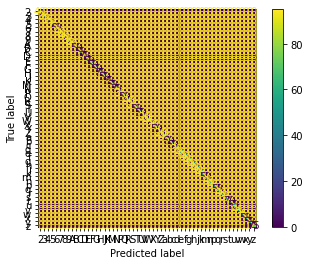

In [124]:
plot_confusion_matrix(clf_best, X_test, Y_test)

In [171]:
Y_pred = clf_best.predict(X_test)

In [172]:
accuracy_score(Y_test,Y_pred)

1.0

In [173]:
with open('best_model.pkl', 'wb') as out_file:
    pickle.dump(clf_best, out_file)

### Live run

In [175]:
def captcha_check():
    with open('best_model.pkl', 'rb') as in_file:
        clf_best = pickle.load(in_file)
    existing_files = set([x.split('_')[-1] for x in glob('captcha_outputs/*')])
    
    for img_file in img_files:
        
        filename = img_file.split('/')[-1].split('.')[0]
        
        # load image file
        with open(img_file, 'r') as img:
            img_base64_decoded = base64.b64decode(img.read())
            
        
        # get rid of all the lines
        svg_rows = [x+'>' for x in img_base64_decoded.decode("utf-8").split('>')[:-1] \
                    if 'fill="none"' not in x]

        # sort characters
        svg_chars = []
        for row in sorted(svg_rows[1:-1], key=lambda x: float(x.split(' ')[2][4:])):
            svg_chars.append(svg_rows[0]+row+svg_rows[-1])
            
        
        # get char png
        for cidx,char in enumerate(svg_chars):
            if str(cidx)+'-'+filename+'.pkl' in existing_files:
                continue
            png = svg2png(bytestring=char)
            pil_img = Image.open(io.BytesIO(png))
            arr_img = np.array(pil_img)
            x2,y2=0,0
            for j in range(len(arr_img[0])-1,-1,-1):
                flag=False
                for i in range(len(arr_img)):
                    if arr_img[i][j].all() != 0:
                        x2,y2=i,j
                        flag=True
                        break
                if flag:
                    break
            clear_output()
            if y2<30:
                arr_img = np.concatenate((arr_img[:, y2+1:y2+30-y2],arr_img), axis=1)
                y2+=30-y2
            arr_img = arr_img[:,y2-30:y2+1]
            pil_img = Image.fromarray(arr_img)
            display(pil_img)
            prediction = clf_best.predict(pd.DataFrame([list(arr_img.flat)]))
            print(prediction)
            time.sleep(0.5)
            ch = prediction[0]
            print(ch)
            if ch=="'":
                continue
            with open('captcha_outputs/'+ch+'_'+str(cidx)+'-'+filename+'.pkl', 'wb') as out_file:
                pickle.dump(arr_img, out_file)

        
        

captcha_check()

KeyboardInterrupt: 

In [36]:
digits = datasets.load_digits()

In [37]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])